In [21]:
import numpy as np
import matplotlib.pyplot as plt

import math
import scipy.sparse as sps

import jlinops
import sampi

In [2]:
ground_truth = jlinops.cameraman()
img_shape = ground_truth.shape
noise_sigma = 0.1
n = math.prod(ground_truth.shape)
F = jlinops.IdentityOperator((n,n))
noise_var = noise_sigma**2
np.random.seed(0)
noisy_signal = F.matvec(ground_truth.flatten()) + noise_sigma*np.random.normal(size=n)

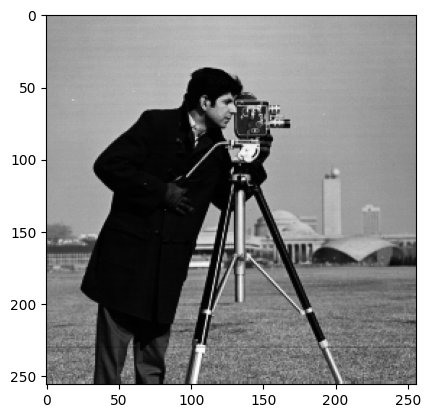

In [3]:
plt.imshow(ground_truth, cmap="gray")
plt.show()

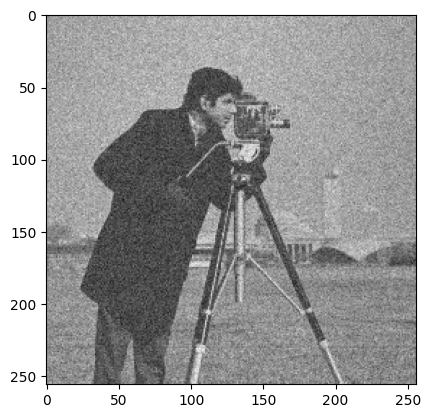

In [4]:
plt.imshow(noisy_signal.reshape(img_shape), cmap="gray")
plt.show()

In [24]:
W = np.ones(n)/np.linalg.norm(np.ones(n))
W = jlinops.MatrixLinearOperator(W)

# R = jlinops.Neumann2D(img_shape)
# Rpinv_factory = lambda theta: jlinops.CGWeightedNeumann2DPinvOperator(img_shape, 1.0/np.sqrt(theta), which="scipy", tol=1e-1)

R, W = jlinops.first_order_derivative_2d(img_shape, boundary="none")
W = jlinops.MatrixLinearOperator(W)
R = jlinops.MatrixLinearOperator(R)
def Rpinv_factory(theta):
    Rtilde = jlinops.MatrixLinearOperator(sps.diags(1.0/np.sqrt(theta)) @ R.A)
    return jlinops.BandedCholeskyPinvOperator(Rtilde, delta=1e-5)
    

pdata = {
    "W": W,
    "Rpinv_factory": Rpinv_factory,
}

In [25]:
# Prior parameters
reg_lambda = 1e1
vartheta = 2/(reg_lambda**2)
hyperparams = {
    "prior": {
        "r": 1.0,
        "beta": 1.5 + 1e-2,
        "vartheta": vartheta,
    },
    # "noise_var": {
    #     "r": -1.0,
    #     "beta": 1,
    #     "vartheta": 1e-4,
    # }
}

# Create solver
solver = sampi.IASSolver(F, R, noisy_signal, hyperparams, noise_var=noise_var, pdata=pdata)

In [63]:
data = solver.solve(max_iters=100, priorconditioning=True, early_stopping=True, warmstarting=True, eps=1e-3)

In [ ]:
np.sum(data["n_cg_its_per_iteration"])

In [ ]:
plt.plot(data["n_cg_its_per_iteration"])
plt.show()

In [62]:
np.sum(data["n_cg_its_per_iteration"])

992

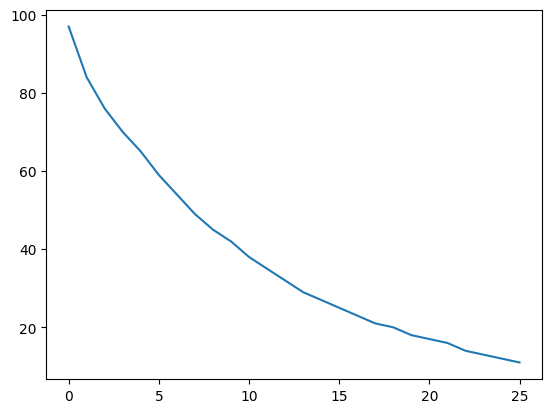

In [55]:
plt.plot(data["n_cg_its_per_iteration"])
plt.show()

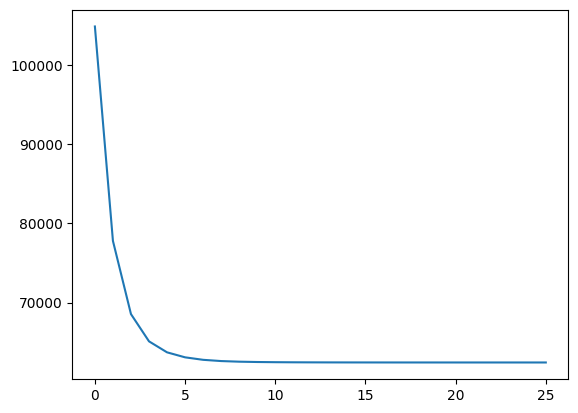

In [56]:
plt.plot(data["obj_vals"])
plt.show()

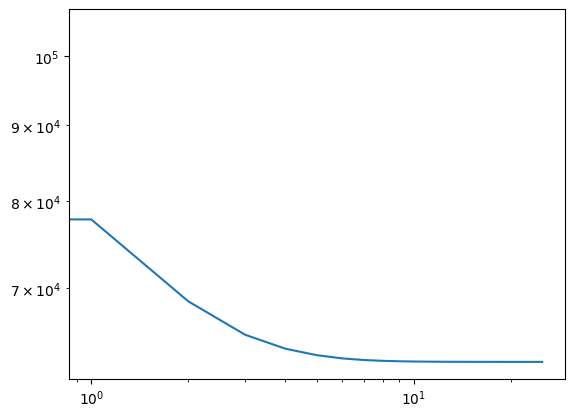

In [57]:
plt.loglog(data["obj_vals"])
#plt.loglog(data["obj_vals"] - 1.5*np.amin(data["obj_vals"]))
plt.show()

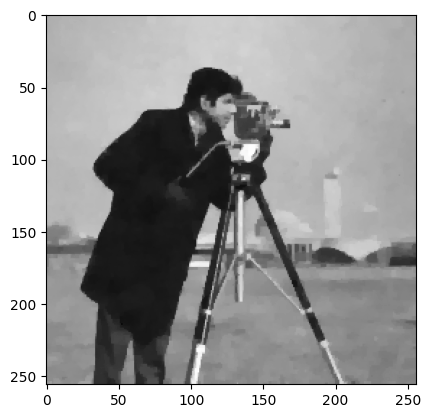

In [58]:
plt.imshow(data["x"].reshape(img_shape), cmap="gray")
plt.show()

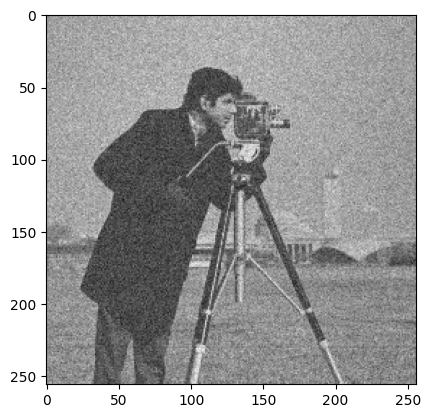

In [59]:
plt.imshow(noisy_signal.reshape(img_shape), cmap="gray")
plt.show()